In [1]:
# TODO: interpolation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data/raw/train_1.csv', index_col=None)
df.columns = map(str.lower, df.columns)

In [5]:
# CHANGE
df = df.fillna(0)

In [6]:
df.columns

Index(['page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [7]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [24]:
row_index = 150

In [25]:
# define input sequence
row = df.iloc[row_index,1:].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(row, n_steps)

In [26]:
row

array([1.0, 5.0, 7.0, 13.0, 4.0, 2.0, 2.0, 11.0, 34.0, 2.0, 3.0, 2.0, 3.0,
       6.0, 1.0, 8.0, 4.0, 1.0, 0.0, 1.0, 2.0, 14.0, 4.0, 2.0, 3.0, 0.0,
       3.0, 4.0, 11.0, 5.0, 6.0, 4.0, 2.0, 1.0, 2.0, 3.0, 5.0, 1.0, 0.0,
       3.0, 0.0, 3.0, 3.0, 0.0, 5.0, 2.0, 5.0, 5.0, 2.0, 2.0, 2.0, 4.0,
       1.0, 2.0, 3.0, 6.0, 1.0, 3.0, 3.0, 1.0, 1.0, 3.0, 0.0, 3.0, 3.0,
       4.0, 5.0, 6.0, 5.0, 1.0, 5.0, 1.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0,
       5.0, 11.0, 1.0, 2.0, 5.0, 2.0, 1.0, 5.0, 3.0, 1.0, 5.0, 2.0, 8.0,
       7.0, 5.0, 4.0, 1.0, 1.0, 4.0, 2.0, 4.0, 0.0, 0.0, 6.0, 3.0, 4.0,
       4.0, 1.0, 0.0, 4.0, 5.0, 5.0, 1.0, 3.0, 1.0, 4.0, 3.0, 3.0, 2.0,
       2.0, 2.0, 0.0, 5.0, 0.0, 4.0, 2.0, 4.0, 5.0, 3.0, 2.0, 2.0, 1.0,
       5.0, 1.0, 3.0, 2.0, 2.0, 0.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0,
       4.0, 7.0, 0.0, 1.0, 6.0, 4.0, 7.0, 7.0, 7.0, 1.0, 3.0, 2.0, 0.0,
       0.0, 7.0, 2.0, 3.0, 6.0, 9.0, 2.0, 2.0, 6.0, 3.0, 2.0, 2.0, 4.0,
       4.0, 3.0, 3.0, 4.0, 3.0, 8.0, 2.0, 0.0, 4.0, 3.0, 1

In [27]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))

In [30]:
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [31]:
X_train = np.reshape(X_train, (382,3,1))
y_train.shape

(382, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import regularizers
from keras.layers import LSTM 
#hidden_nodes = int(2/3 * (3 * 1))
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(None, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/Users/marcopellegrino/miniconda3/envs/marcoenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0370
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100  
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0114
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 
Epoch 14/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 
Epoch 15/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [34]:
X_test_copy = X_test
X_test_copy = np.reshape(X_test_copy,(-1,1))
X_test_copy = sc.transform(X_test_copy)

In [35]:
X_test.shape

(165, 3, 1)

In [36]:
X_test_copy.shape

(495, 1)

In [37]:
X_test_copy = np.reshape(X_test_copy, (165, 3, 1))
y_pred = model.predict(X_test_copy)
y_pred = sc.inverse_transform(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [38]:
y_pred

array([[3.0394533],
       [2.8992848],
       [3.3597395],
       [4.018943 ],
       [3.0990834],
       [2.9143524],
       [3.2352443],
       [3.937791 ],
       [3.2652829],
       [3.7876422],
       [4.117359 ],
       [2.657891 ],
       [3.8119853],
       [3.3322988],
       [2.779707 ],
       [3.5083654],
       [3.1218202],
       [4.0118637],
       [2.929393 ],
       [4.561833 ],
       [3.1342325],
       [2.99928  ],
       [2.657891 ],
       [3.935045 ],
       [3.4337926],
       [3.6906528],
       [3.8885922],
       [3.0769167],
       [4.8155127],
       [2.7027304],
       [3.435938 ],
       [3.3254204],
       [3.0990834],
       [3.3019776],
       [3.3054452],
       [3.0361905],
       [4.5200944],
       [3.7295663],
       [3.1740477],
       [5.910066 ],
       [3.5630686],
       [4.183681 ],
       [2.610689 ],
       [3.256905 ],
       [3.2605088],
       [2.7027304],
       [3.599025 ],
       [3.6210613],
       [3.1890728],
       [3.5534945],


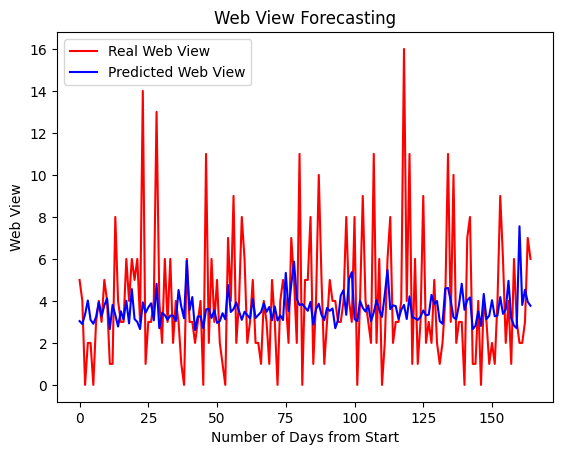

In [39]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()